# Estimation of the magnetic amplitude from total-field anomaly data using equivalent layer

In [340]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import pandas as pd

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from fatiando.gridder import regular
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [341]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

# Input

### Importing TFA data

In [342]:
data = pd.read_csv('anitapolis_decimated_tfa_residual.txt', skipinitialspace=True, delim_whitespace=True)

In [343]:
xp = data['X'].get_values()
yp = data['Y'].get_values()
zp = np.zeros(xp.size) - 100.
dobs = data['mag_res1'].get_values()

In [344]:
xp.size

2400

In [345]:
# main field
inc = -37.05
dec = -18.17

#figura
incs = -37.05
decs = -18.17

In [346]:
h = np.zeros(xp.size) + 300.  # layer depth
A_tf = msf.sm_tf_sphere(xp, yp, zp, xp, yp, h, inc, dec, incs, decs)

In [347]:
I = np.identity(xp.size)
f0 = np.trace(np.dot(A_tf.T, A_tf))/xp.size
u0 = 0.001

In [348]:
vp = np.linalg.solve(np.dot(A_tf.T,A_tf) + u0*f0*I,np.dot(A_tf.T,dobs))

In [349]:
tf = np.dot(A_tf,vp)

In [350]:
z_up = -500.

A_up = msf.sm_tf_sphere(xp, yp, zp + z_up + 100., xp, yp, h, inc, dec, incs, decs)
upward_tfa = np.dot(A_up, vp)

In [351]:
mypath = 'eqlayer_rs/direction_inc%d_dec%d_h%dm' % (incs, decs, h[0])
if not os.path.isdir(mypath):
   os.makedirs(mypath)

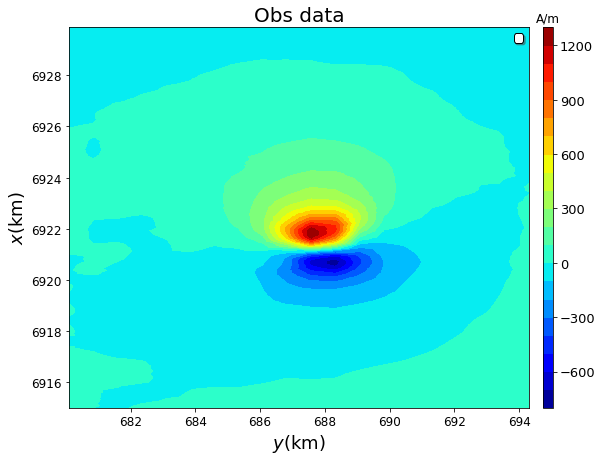

In [352]:
plt.figure(figsize=(10,7))
plt.title('Obs data', fontsize=20)
plt.tricontourf(yp, xp, dobs, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.show()

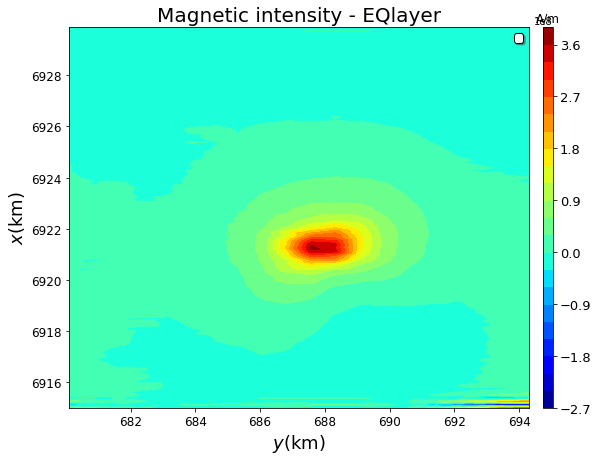

In [353]:
plt.figure(figsize=(10,7))
plt.title('Magnetic intensity - EQlayer', fontsize=20)
plt.tricontourf(yp, xp, vp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('momentum_mag_intensity_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

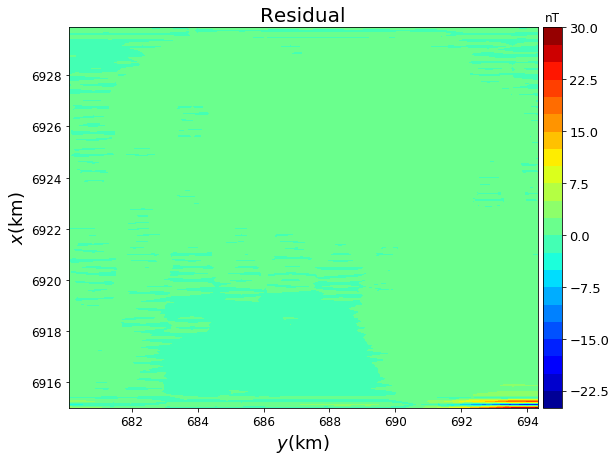

In [354]:
plt.figure(figsize=(10,7))
plt.title('Residual', fontsize=20)
plt.tricontourf(yp, xp, dobs - tf, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'anitapolis_eqlayer_residual_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

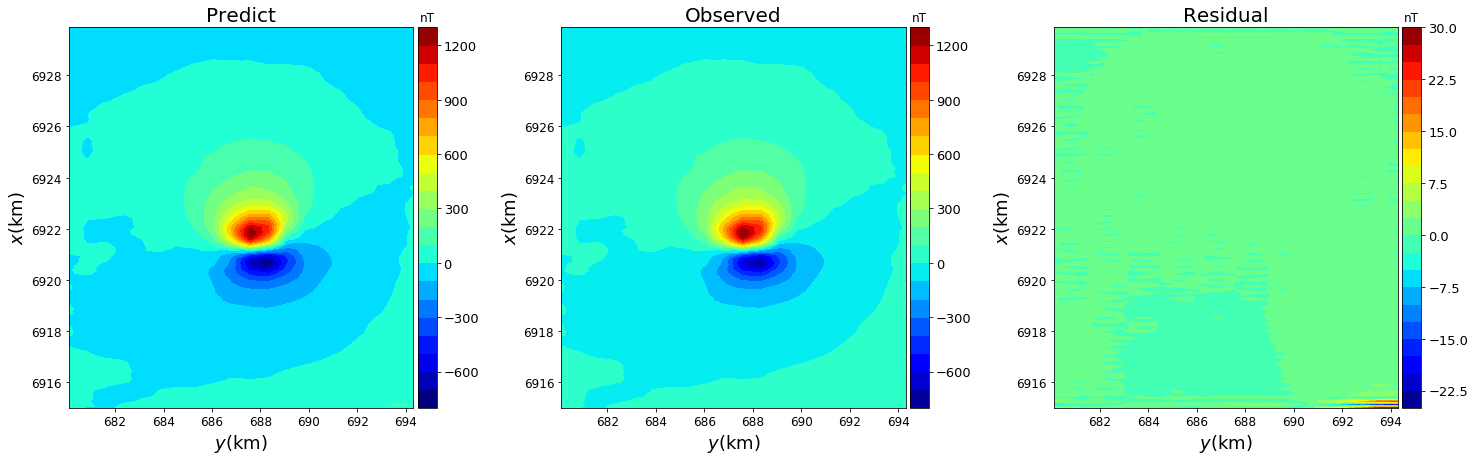

In [355]:
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
plt.tricontourf(yp, xp, tf,20, cmap='jet', vmin=np.min(dobs), vmax=np.max(dobs)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(yp, xp, dobs, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
plt.tricontourf(yp, xp, dobs - tf, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'anitapolis_eqlayer_fit_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


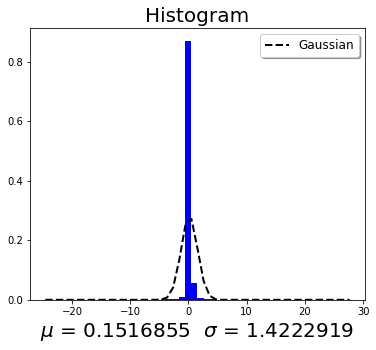

In [356]:
mean = np.mean(dobs - tf)
std = np.std(dobs - tf)
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
nbins=50
n, bins, patches = plt.hist(dobs - tf,bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.xticks(np.linspace(-100*std, 100*std, 5),)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'anitapolis_tfa_hist_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

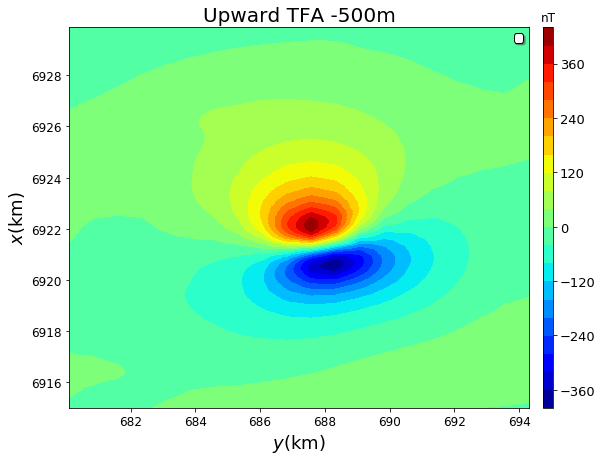

In [357]:
plt.figure(figsize=(10,7))
plt.title('Upward TFA %dm' % (z_up), fontsize=20)
plt.tricontourf(yp, xp, upward_tfa, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'anitapolis_tfa_upward_%dm_inc%d_dec%d.png' % (z_up, incs, decs), dpi=300)
plt.show()

In [358]:
area = [8210000., 8216000., 475000., 481000.]
shape = (50, 50)
x, y, z = regular(area, shape, z=-150.)

In [359]:
A_bx = msf.sm_bx_sphere(xp, yp, zp, xp, yp, h, incs, decs)

Bx = np.dot(A_bx,vp)

In [360]:
A_by = msf.sm_by_sphere(xp, yp, zp, xp, yp, h, incs, decs)

By = np.dot(A_by,vp)

In [361]:
A_bz = msf.sm_bz_sphere(xp, yp, zp, xp, yp, h, incs, decs)

Bz = np.dot(A_bz,vp)

In [362]:
mag_amp = np.sqrt(Bx**2 + By**2 + Bz**2)

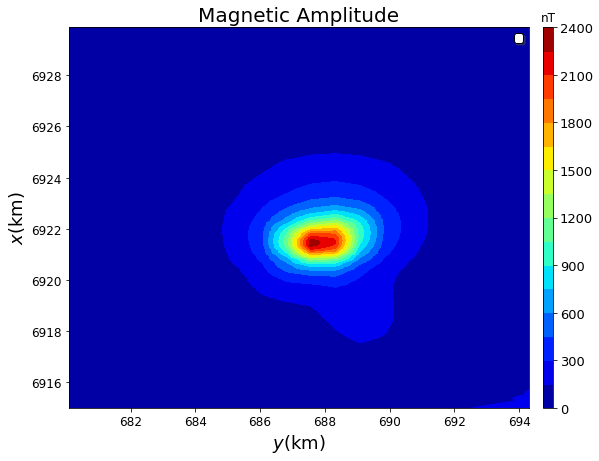

In [363]:
plt.figure(figsize=(10,7))
plt.title('Magnetic Amplitude', fontsize=20)
plt.tricontourf(yp, xp, mag_amp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(xp), np.max(xp)))
plt.xlim((np.min(yp), np.max(yp)))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'magnetic_amplitude_inc%d_dec%d.png' % (incs, decs), dpi=300)
plt.show()

In [364]:
diorama_eqlayer = dict()

In [365]:
diorama_eqlayer['layer_depth'] = h[0]
diorama_eqlayer['regularization'] = u0
diorama_eqlayer['layer_parameters'] = vp
diorama_eqlayer['upward'] = upward_tfa
diorama_eqlayer['amf'] = mag_amp
diorama_eqlayer['x'] = xp
diorama_eqlayer['y'] = yp
diorama_eqlayer['z'] = zp + z_up + 100. 

In [366]:
file_name = mypath+'/eqlayer_depth%dm.pickle' % (h[0])
with open(file_name, 'w') as f:
    pickle.dump(diorama_eqlayer, f)